In [1]:

def d3_armor_reduction(df):
    df_c = df.copy()
    df_c['d3_res_reduction'] = (df_c['armor'] / (df_c['armor'] + df_c['lvl'] * 5)) * 100
    df_c['d3_res_dmg_taken'] = df_c['dpt100'] / 100 * (100 - df_c['d3_res_reduction'])
    return df_c


def lol_res_reduction(df):
    df_c = df.copy()
    lol_multi_cond = [df_c['armor'] < 0, df_c['armor'] >= 0]
    lol_neg_def = 2 - (100 / (100 - df_c['armor']))
    lol_pos_def = 100 / (100 + df_c['armor'])

    df_c['dmg_multi_lol'] = np.select(lol_multi_cond, [lol_neg_def, lol_pos_def])
    df_c['lol_dmg_taken'] = df_c['dmg_multi_lol'] * df_c['dpt100']
    return df_c


def avg_dmg_redu_dodge(df):
    df_c = df.copy()
    df_c['lol_dmg_redu_dodge'] = df_c['lol_dmg_taken'] * (1 - (df_c['dodge'] / 100))
    df_c['d3_dmg_redu_dodge'] = df_c['d3_res_dmg_taken'] * (1 - (df_c['dodge'] / 100))
    return df_c

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from all_more_base_stats import *
f_results = fight_results[fight_results.columns[-(len(cl_df_list)*2):]]


('dex_class', {'starting_pts': 58, 'growth_pts': 12})
('str_class', {'starting_pts': 58, 'growth_pts': 12})
('int_class', {'starting_pts': 58, 'growth_pts': 12})


In [3]:
f_results.apply(lambda row: [(unit.name, round(unit.hp / unit.max_hp * 100, 2)) for unit in row])

,dex_v_str_d3,int_v_str_d3,int_v_dex_d3,dex_v_str_lol,int_v_str_lol,int_v_dex_lol
0,"(dex_cl, 3.41)","(int_cl, 14.21)","(int_cl, 32.11)","(dex_cl, 1.46)","(int_cl, 30.0)","(int_cl, 47.37)"
1,"(str_cl, 9.14)","(str_cl, 1.14)","(int_cl, 41.48)","(str_cl, 21.9)","(int_cl, 10.37)","(int_cl, 24.69)"
2,"(str_cl, 20.86)","(str_cl, 19.83)","(int_cl, 33.02)","(str_cl, 22.76)","(int_cl, 8.14)","(int_cl, 18.84)"
3,"(str_cl, 26.61)","(str_cl, 2.99)","(int_cl, 22.86)","(str_cl, 48.19)","(int_cl, 27.03)","(int_cl, 27.47)"
4,"(str_cl, 23.19)","(str_cl, 18.12)","(dex_cl, 5.61)","(str_cl, 9.86)","(int_cl, 3.75)","(dex_cl, 8.77)"
5,"(str_cl, 11.28)","(str_cl, 32.35)","(dex_cl, 26.56)","(str_cl, 33.83)","(int_cl, 42.97)","(int_cl, 37.62)"
6,"(str_cl, 19.12)","(str_cl, 13.38)","(int_cl, 32.08)","(str_cl, 11.75)","(int_cl, 15.47)","(int_cl, 19.25)"
7,"(str_cl, 4.09)","(str_cl, 33.68)","(int_cl, 10.27)","(str_cl, 9.12)","(str_cl, 19.3)","(int_cl, 48.83)"
8,"(str_cl, 26.37)","(str_cl, 21.87)","(int_cl, 18.62)","(dex_cl, 26.44)","(str_cl, 6.15)","(int_cl, 36.21)"
9,"(str_cl, 31.61)","(str_cl, 8.39)","(int_cl, 17.36)","(dex_cl, 14.81)","(str_cl, 20.0)","(dex_cl, 9.74)"


In [4]:
get_unit_attribute(f_results, 'name').describe()

,dex_v_str_d3,int_v_str_d3,int_v_dex_d3,dex_v_str_lol,int_v_str_lol,int_v_dex_lol
count,30,30,30,30,30,30
unique,2,2,2,2,2,2
top,str_cl,str_cl,int_cl,str_cl,str_cl,dex_cl
freq,18,24,19,19,17,17


In [5]:
# approx turns it took to win
turns_to_win = (get_unit_attribute(f_results, 'ct_to_win') / 100)[1:]  # clock ticks it took to win / 100 ticks (for a turn)
turns_to_win

,dex_v_str_d3,int_v_str_d3,int_v_dex_d3,dex_v_str_lol,int_v_str_lol,int_v_dex_lol
1,37.10,25.44,16.96,12.72,9.54,8.48
2,25.44,19.08,14.70,10.60,8.40,7.35
3,21.00,16.80,12.48,8.40,7.28,5.20
4,21.00,12.60,11.76,11.55,10.30,8.82
5,19.76,10.40,10.67,10.40,5.10,6.12
6,17.68,11.44,8.08,10.40,7.07,6.06
7,17.51,9.27,8.00,11.33,6.18,5.00
8,15.45,10.30,8.91,11.28,7.21,4.95
9,13.26,8.16,5.88,11.04,6.12,6.44
10,14.56,8.16,4.55,10.01,5.82,7.76


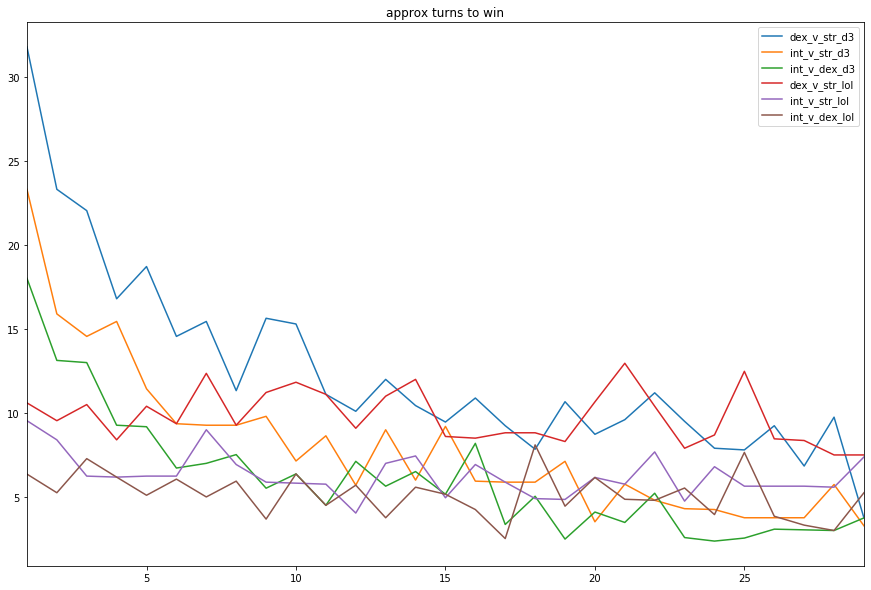

In [7]:

turns_to_win.plot(title='approx turns to win' ,figsize=[15,10])

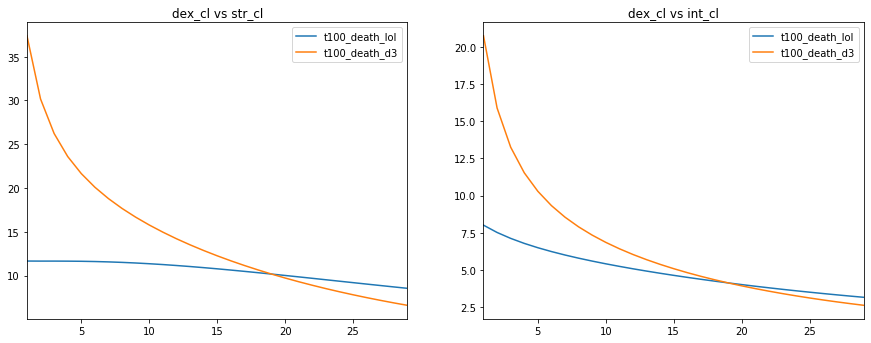

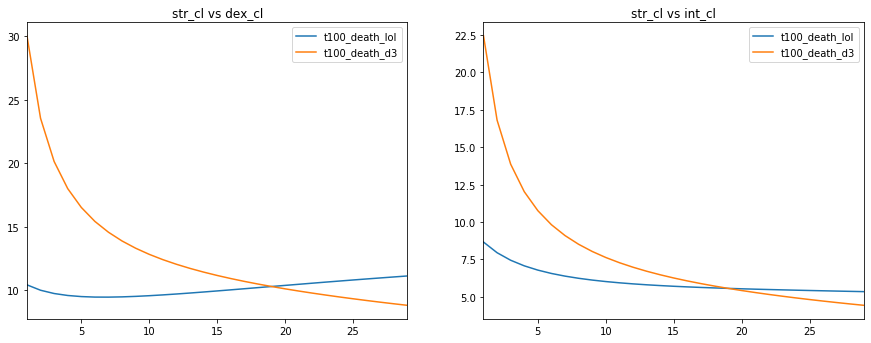

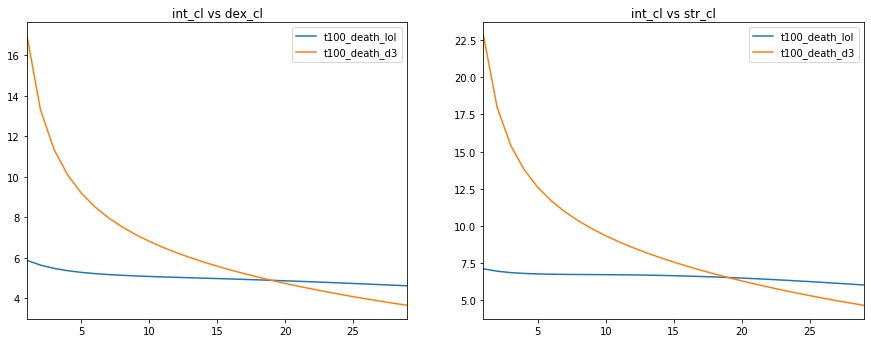

In [8]:
# how many 100clock ticks does it take to kill the defender
for i,attacker in enumerate(cl_df_list):
    cl_df_l_copy = cl_df_list.copy()
    cl_df_l_copy.pop(i)
    
    fig = plt.figure(figsize=[15, 12])
    for n, defender in enumerate(cl_df_l_copy):
        ax = fig.add_subplot(221+n)
        test_df = pd.concat([attacker[['dpt100', 'lvl']], defender[['dodge', 'd3_res_reduction', 'dmg_multi_lol', 'hp', 'armor']]], axis=1)
        
        test_df = d3_armor_reduction(test_df)
        test_df = lol_res_reduction(test_df)
        test_df = avg_dmg_redu_dodge(test_df)
        test_df['t100_death_lol'] = test_df['hp'] / test_df['lol_dmg_redu_dodge']
        test_df['t100_death_d3'] = test_df['hp'] / test_df['d3_dmg_redu_dodge']
        test_df[['t100_death_lol', 't100_death_d3']].iloc[1:].plot(title=attacker.name+' vs '+defender.name, ax=ax)

In [9]:
compare(all_cl_df, ['speed', 'ticks_to_turn'])

,speed_dex,speed_str,speed_int,ticks_to_turn_dex,ticks_to_turn_str,ticks_to_turn_int
0,9.70,9.40,9.4,103.09,106.38,106.38
1,9.83,9.45,9.5,101.73,105.82,105.26
2,9.96,9.50,9.6,100.40,105.26,104.17
3,10.09,9.55,9.7,99.11,104.71,103.09
4,10.22,9.60,9.8,97.85,104.17,102.04
5,10.35,9.65,9.9,96.62,103.63,101.01
6,10.48,9.70,10.0,95.42,103.09,100.00
7,10.61,9.75,10.1,94.25,102.56,99.01
8,10.74,9.80,10.2,93.11,102.04,98.04
9,10.87,9.85,10.3,92.00,101.52,97.09


In [10]:
compare(all_cl_df, ['dodge', 'crit_dmg', 'crit_chan'])

,dodge_dex,dodge_str,dodge_int,crit_dmg_dex,crit_dmg_str,crit_dmg_int,crit_chan_dex,crit_chan_str,crit_chan_int
0,9.510,7.420,7.42,180,150,150,9.75,7.25,7.25
1,10.149,7.635,7.85,190,154,157,10.75,7.75,8.00
2,10.788,7.850,8.28,200,158,164,11.75,8.25,8.75
3,11.427,8.065,8.71,210,162,171,12.75,8.75,9.50
4,12.066,8.280,9.14,220,166,178,13.75,9.25,10.25
5,12.705,8.495,9.57,230,170,185,14.75,9.75,11.00
6,13.344,8.710,10.00,240,174,192,15.75,10.25,11.75
7,13.983,8.925,10.43,250,178,199,16.75,10.75,12.50
8,14.622,9.140,10.86,260,182,206,17.75,11.25,13.25
9,15.261,9.355,11.29,270,186,213,18.75,11.75,14.00


In [11]:
compare(all_cl_df, ['m_dmg_wo_wpn', 'd_dmg_wo_wpn', 'p_dmg_wo_wpn','b_dmg' ,'dpt100'])

,m_dmg_wo_wpn_dex,m_dmg_wo_wpn_str,m_dmg_wo_wpn_int,d_dmg_wo_wpn_dex,d_dmg_wo_wpn_str,d_dmg_wo_wpn_int,p_dmg_wo_wpn_dex,p_dmg_wo_wpn_str,p_dmg_wo_wpn_int,b_dmg_dex,b_dmg_str,b_dmg_int,dpt100_dex,dpt100_str,dpt100_int
0,4.2,4.2,20.4,13.2,6.2,6.2,7.6,11.1,3.4,46.80,44.63,79.535,48.94,43.47,77.48
1,6.6,5.7,25.5,15.9,7.5,8.2,8.9,14.5,4.7,54.22,54.91,96.505,58.45,54.06,95.86
2,9.0,7.2,30.6,18.6,8.8,10.2,10.2,17.9,6.0,61.65,65.20,113.475,68.62,64.91,115.03
3,11.4,8.7,35.7,21.3,10.1,12.2,11.5,21.3,7.3,69.07,75.48,130.445,79.46,76.00,135.07
4,13.8,10.2,40.8,24.0,11.4,14.2,12.8,24.7,8.6,76.50,85.77,147.415,91.08,87.36,156.02
5,16.2,11.7,45.9,26.7,12.7,16.2,14.1,28.1,9.9,83.92,96.05,164.385,103.51,99.01,177.96
6,18.6,13.2,51.0,29.4,14.0,18.2,15.4,31.5,11.2,91.35,106.34,181.355,116.84,110.98,200.96
7,21.0,14.7,56.1,32.1,15.3,20.2,16.7,34.9,12.5,98.77,116.62,198.325,131.13,123.24,225.10
8,23.4,16.2,61.2,34.8,16.6,22.2,18.0,38.3,13.8,106.20,126.91,215.295,146.45,135.85,250.44
9,25.8,17.7,66.3,37.5,17.9,24.2,19.3,41.7,15.1,113.62,137.19,232.265,162.87,148.79,277.07


In [12]:
compare(all_cl_df, ['m_dmg', 'p_dmg', 'dpt100'])

,m_dmg_dex,m_dmg_str,m_dmg_int,p_dmg_dex,p_dmg_str,p_dmg_int,dpt100_dex,dpt100_str,dpt100_int
0,22.05,23.75,79.535,31.40,44.63,22.965,48.94,43.47,77.48
1,28.65,28.29,96.505,34.97,54.91,27.295,58.45,54.06,95.86
2,35.25,32.83,113.475,38.55,65.20,31.615,68.62,64.91,115.03
3,41.85,37.37,130.445,42.12,75.48,35.945,79.46,76.00,135.07
4,48.45,41.90,147.415,45.70,85.77,40.275,91.08,87.36,156.02
5,55.05,46.44,164.385,49.27,96.05,44.595,103.51,99.01,177.96
6,61.65,50.98,181.355,52.85,106.34,48.925,116.84,110.98,200.96
7,68.25,55.52,198.325,56.42,116.62,53.245,131.13,123.24,225.10
8,74.85,60.05,215.295,60.00,126.91,57.575,146.45,135.85,250.44
9,81.45,64.59,232.265,63.57,137.19,61.905,162.87,148.79,277.07


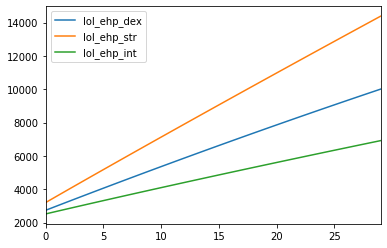

In [12]:
compare(all_cl_df, ['lol_ehp',]).plot()

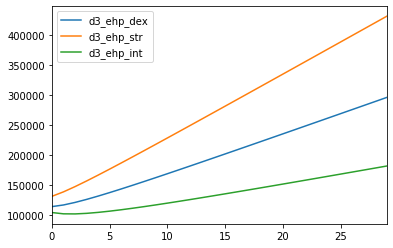

In [13]:
compare(all_cl_df, ['d3_ehp',]).plot()

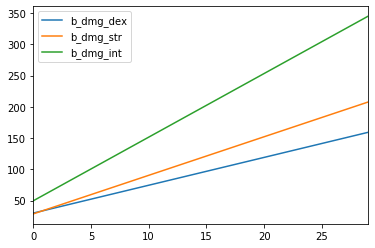

In [14]:
compare(all_cl_df, ['b_dmg',]).plot()

In [8]:
cl_df_l_copy = cl_df_list.copy()

In [9]:
cl_df_l_copy[1]

,lvl,vit,dex,str,int,agility,toughness,u_name,speed,ticks_to_turn,...,armor,dodge,d3_res_reduction,d3_res_dmg_taken,dmg_multi_lol,lol_dmg_taken,lol_dmg_redu_dodge,d3_dmg_redu_dodge,lol_ehp,d3_ehp
0,1,14,8,15,4,8,9,str_cl,9.40,106.38,...,26.0,7.420,83.870968,4.520968,0.793651,22.246032,20.595376,4.185512,1481.843698,59628.753581
1,2,17,9,19,5,9,11,str_cl,9.45,105.82,...,32.5,7.635,76.470588,8.096471,0.754717,25.969811,23.987016,7.478305,1670.078425,60363.563441
2,3,20,10,23,6,10,13,str_cl,9.50,105.26,...,39.0,7.850,72.222222,11.369444,0.719424,29.446043,27.134529,10.476943,1860.753831,62651.445278
3,4,23,11,27,7,11,15,str_cl,9.55,104.71,...,45.5,8.065,69.465649,14.537405,0.687285,32.721649,30.082648,13.364963,2053.499595,65674.198947
4,5,26,12,31,8,12,17,str_cl,9.60,104.17,...,52.0,8.280,67.532468,17.678571,0.657895,35.822368,32.856276,16.214786,2248.008737,69102.419195
5,6,29,13,35,9,13,19,str_cl,9.65,103.63,...,58.5,8.495,66.101695,20.837288,0.630915,38.782334,35.487775,19.067161,2444.024636,72777.917059
6,7,32,14,39,10,14,21,str_cl,9.70,103.09,...,65.0,8.710,65.000000,24.034500,0.606061,41.618182,37.993238,21.941095,2641.331106,76615.270500
7,8,35,15,43,11,15,23,str_cl,9.75,102.56,...,71.5,8.925,64.125561,27.286099,0.583090,44.349854,40.391630,24.850814,2839.744738,80564.298857
8,9,38,16,47,12,16,25,str_cl,9.80,102.04,...,78.0,9.140,63.414634,30.600000,0.561798,46.988764,42.693991,27.803160,3039.108910,84593.588220
9,10,41,17,51,13,17,27,str_cl,9.85,101.52,...,84.5,9.355,62.825279,33.996283,0.542005,49.566396,44.929459,30.815930,3239.289075,88682.468470
